## EDA

Одной из ключевых частей работы с  данными является EDA, представляющий из себя разведочный анализ данных. В этом пункте мы углубимся в визуализацию основных переменных и постараемся выявить интересные тенденции и взаимосвязи в данных. 

### Признаки:
   * **Brand** - марка автомбиля *(категориальный признак)*
   * **Year** - год выпуска машины *(вещественный  признак)*
   * **Exterior color** - цвет машины *(категориальный признак)*
   * **Interior color** - цвет салона *(категориальный признак)*
   * **Drivetrain** - трансмиссия автомобиля, т.е. информация о его ведущие колеса  *(категориальный признак)*
   * **Fuel type** - тип топлива *(категориальный признак)*
   * **Capacity** - объем двигателя, литры *(вещественный признак)*
   * **Configuration** - конфигурация автомобиля *(категориальный признак)*
   * **Valves** - количество клапанов, штуки *(вещественный признак)*
   * **Accidents or damage** - наличие аварий у машины *(бинарный признак)*
   * **1-owner vehicle** - информация о количестве владельцев автомобиля, один ли владелец у машины *(бинарный признак)*
   * **Personal use only** - предназначенность машины исключительно для личных целей *(бинарный признак)*
   * **MPG_min** - удельный израсход топлива при минимальном использовании мощности машины, мили *(вещественный признак)*
   * **MPG_max** - удельный израсход топлива при максимальном использовании мощности машины, мили *(вещественный признак)*
   * **MPG_mean** - удельный израсход топлива при среднем использовании мощности машины, мили *(вещественный признак)*
   * **Mileage** - пробег, мили *(вещественный признак)*
   
И одна целевая переменная **Price** - цена автомобиля, доллары.

# Идеи новых переменных:

* интенсивность использования: большой год выпуска + маленький объем двигателя + большой пробег = высокая интенсивность использования

* Комбинация всех характеристик двигателя: может, есть одна самая популярная

* Средний пробег в год: пробег / (2023 - год выпуска)

---

In [1]:
import pandas as pd # подгрузим необходимые нам библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from wordcloud import STOPWORDS, WordCloud

import warnings
warnings.filterwarnings("ignore")

In [2]:
cars_df = pd.read_csv('cars_df_final.csv') # загрузим нашу таблицу

In [3]:
cars_df.head()

,Brand,Year,Exterior color,Interior color,Drivetrain,Fuel type,Capacity,Configuration,Valves,Accidents or damage,1-owner vehicle,Personal use only,MPG_min,MPG_max,MPG_mean,Mileage,Price
0,Hyundai,2022,Red,Black,Front-wheel Drive,Gasoline,2.5,I4,16.0,At least 1 accident or damage reported,Yes,Yes,22.000000,28.000000,25.000000,13256.0,38988.0
1,Lexus,2016,Black,Black,All-wheel Drive,Gasoline,3.5,V6,24.0,At least 1 accident or damage reported,No,Yes,19.000000,26.000000,22.500000,100067.0,19747.0
2,Chevrolet,2017,White,Black,Front-wheel Drive,Hybrid,1.5,I4,16.0,At least 1 accident or damage reported,Yes,No,20.592777,27.239548,23.916163,39032.0,25999.0
3,Mercedes-Benz,2022,White,Other,All-wheel Drive,Gasoline,3.0,I6,24.0,None reported,Yes,No,20.592777,27.239548,23.916163,10901.0,96750.0
4,Land Rover,2020,Blue,Other,Four-wheel Drive,Gasoline,3.0,I6,24.0,None reported,Yes,Yes,17.000000,22.000000,19.500000,24946.0,61530.0


In [4]:
cars_df.info() # посмотим на основную информацию о наших данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                2542 non-null   object 
 1   Year                 2542 non-null   int64  
 2   Exterior color       2542 non-null   object 
 3   Interior color       2542 non-null   object 
 4   Drivetrain           2542 non-null   object 
 5   Fuel type            2542 non-null   object 
 6   Capacity             2542 non-null   float64
 7   Configuration        2542 non-null   object 
 8   Valves               2542 non-null   float64
 9   Accidents or damage  2542 non-null   object 
 10  1-owner vehicle      2542 non-null   object 
 11  Personal use only    2542 non-null   object 
 12  MPG_min              2542 non-null   float64
 13  MPG_max              2542 non-null   float64
 14  MPG_mean             2542 non-null   float64
 15  Mileage              2542 non-null   f

### Анализ вещественных признаков

Для начала давайте посмотрим на ключевые статистики по всем вещественным признакам с помощью метода describe.

In [5]:
cars_df.describe() 

,Year,Capacity,Valves,MPG_min,MPG_max,MPG_mean,Mileage,Price
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000,2.542000e+03
mean,2017.993706,3.289772,21.088906,20.526843,27.257775,23.892309,47746.267899,4.128942e+04
std,4.348635,1.353209,5.986273,5.580197,5.352857,5.325129,42007.429216,8.226649e+04
min,1982.000000,1.200000,12.000000,9.000000,14.000000,12.000000,100.000000,3.332000e+03
25%,2016.000000,2.000000,16.000000,17.000000,24.000000,21.000000,18180.750000,2.350000e+04
50%,2019.000000,3.000000,24.000000,20.592777,27.239548,23.916163,37314.500000,3.334300e+04
75%,2021.000000,3.800000,24.000000,22.000000,30.000000,26.000000,67643.750000,4.599900e+04
max,2023.000000,8.400000,50.000000,58.000000,60.000000,59.000000,769511.000000,3.800000e+06


---

In [6]:
cars_df.sort_values(by='Price').tail(3)

,Brand,Year,Exterior color,Interior color,Drivetrain,Fuel type,Capacity,Configuration,Valves,Accidents or damage,1-owner vehicle,Personal use only,MPG_min,MPG_max,MPG_mean,Mileage,Price
1845,Lamborghini,2016,Other,Other,All-wheel Drive,Gasoline,6.5,V12,48.0,None reported,No,No,11.000000,18.000000,14.500000,4271.0,550981.0
2486,Ferrari,2021,Black,Other,All-wheel Drive,Hybrid,4.0,V8,32.0,None reported,No,No,20.592777,27.239548,23.916163,1942.0,652000.0
1650,Ferrari,2014,Other,Other,Rear-wheel Drive,Hybrid,6.3,V12,48.0,None reported,No,No,12.000000,16.000000,14.000000,5803.0,3800000.0


In [7]:
cars_df.sort_values(by='Mileage').tail(3)

,Brand,Year,Exterior color,Interior color,Drivetrain,Fuel type,Capacity,Configuration,Valves,Accidents or damage,1-owner vehicle,Personal use only,MPG_min,MPG_max,MPG_mean,Mileage,Price
365,Honda,2010,Silver/Gray,Other,Front-wheel Drive,Gasoline,1.8,I4,16.0,At least 1 accident or damage reported,Yes,No,25.0,36.0,30.5,284310.0,7495.0
130,Mitsubishi,2018,Blue,Black,Four-wheel Drive,Gasoline,2.0,I4,16.0,None reported,Yes,Yes,23.0,29.0,26.0,320849.0,9920.0
2451,Kia,2018,White,Black,Front-wheel Drive,Hybrid,2.0,I4,16.0,None reported,No,Yes,39.0,46.0,42.5,769511.0,15999.0


Нетрудно заметить, что в колонкax Price и Mileage есть сильные выбросы, которые отличаются от среднего практически в 20+ раз, поэтому давайте от них избавимся, чтобы в дальнейшем эти аномальные значения не вызывали у нас трудностей при построении модели и визуализации данных.

In [8]:
cars_df = cars_df.drop(cars_df[cars_df['Price'] == cars_df['Price'].max()].index)
cars_df = cars_df.drop(cars_df[cars_df['Mileage'] == cars_df['Mileage'].max()].index)

---

Теперь давайте посмотрим на коэффициенты корреляции между всеми вещественными признаками с целью выявления определенных зависимостей. Корреляционная таблица так же поможет нам понять, какие именно графики строить и что ожидать при их построении.

In [9]:
cars_df.corr()

,Year,Capacity,Valves,MPG_min,MPG_max,MPG_mean,Mileage,Price
Year,1.000000,-0.223151,-0.102591,0.137837,0.115025,0.130054,-0.620656,0.304455
Capacity,-0.223151,1.000000,0.532191,-0.541318,-0.591412,-0.580942,0.188525,0.275593
Valves,-0.102591,0.532191,1.000000,-0.464068,-0.487354,-0.488158,0.054149,0.385442
MPG_min,0.137837,-0.541318,-0.464068,1.000000,0.897296,0.975088,-0.086134,-0.197445
MPG_max,0.115025,-0.591412,-0.487354,0.897296,1.000000,0.972860,-0.074491,-0.242009
MPG_mean,0.130054,-0.580942,-0.488158,0.975088,0.972860,1.000000,-0.082583,-0.225110
Mileage,-0.620656,0.188525,0.054149,-0.086134,-0.074491,-0.082583,1.000000,-0.394864
Price,0.304455,0.275593,0.385442,-0.197445,-0.242009,-0.225110,-0.394864,1.000000


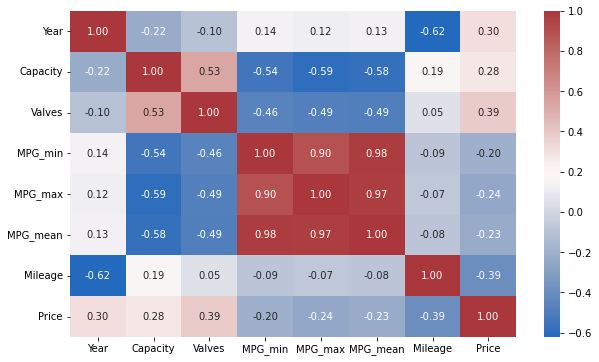

In [10]:
ax, fig = plt.subplots(figsize=(10, 6))
sns.heatmap(cars_df.corr(), cmap="vlag", annot=True, fmt="0.2f"); # визуализируем нашу таблицу

**Вывод:** Таким образом, проанализировав heatmap и корреляционную матрицу, мы можем установить умереннную положительную взаимосвязь между ценой автомобиля и годом выпуска машины, а также умеренную отрицательную взаимосвязь между целевой переменной и пробегом машины. Данные закономерности оказываются весьма ожидаемыми, однако есть и другие не столь типичные связи. Среди них положительная корреляция между ценой и количесвтом циллиндров, а также сильная отрицательная взаимосвязь между годом выпуска и пробегом. Нетрудно также заметить, достаточно высокую попарную корреляцию по модулю между такими показателями, как MPG_min/MPG_max, Valves, Capacity, однако столь высокая статистическая взаимосвязь между переменными обусловлена их непосредстенной связью с двигателем и его возможностями.

---

Теперь давайте перейдем к более детальному рассмотрению ключевых признаков и их связи с целевой переменной:

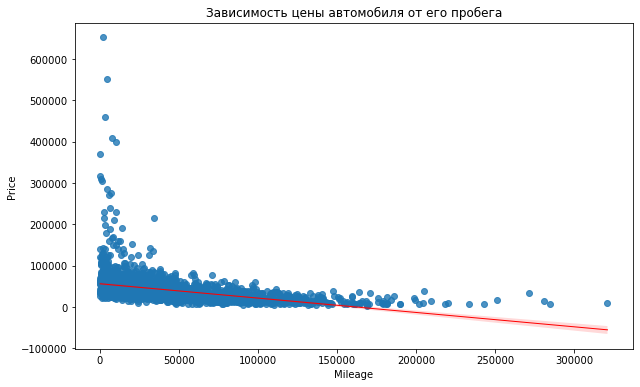

In [11]:
ax, fig = plt.subplots(figsize=(10, 6))  # для начала давайте посмотрим на зависимость цены от пробега

sns.regplot(x="Mileage", y="Price", data=cars_df, line_kws={"color": "red", "linewidth": 1})

#plt.text(x=280000, y=5000, s="Regression Line")
plt.title('Зависимость цены автомобиля от его пробега');

**Вывод:** Из диаграммы рассеяния видно, что между стоимостью поддержанного автомобиля и пробегом существует отрицательная взаимосвязь. Как правило, чем больше пробег машины, тем меньше будет его стоимость. В данных также присуствует значительное количество объектов, принимающих нестандартные для данного диапозона пробега стоимости. Это и есть наши выбросы. Давайте теперь рассмотрим независимо два этих признака.

---

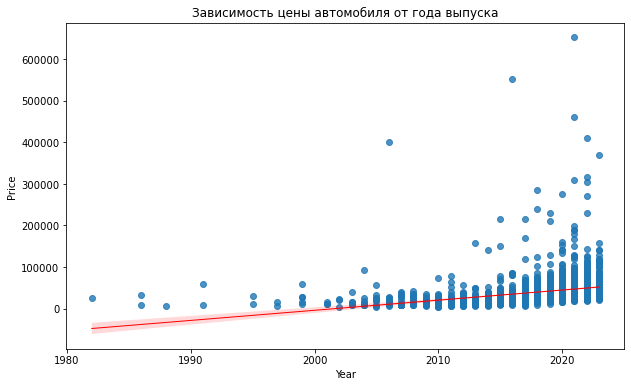

In [12]:
ax, fig = plt.subplots(figsize=(10, 6))  # для начала давайте посмотрим на зависимость цены от пробега

sns.regplot(x="Year", y="Price", data=cars_df, line_kws={"color": "red", "linewidth": 1})

#plt.text(x=280000, y=5000, s="Regression Line")
plt.title('Зависимость цены автомобиля от года выпуска');

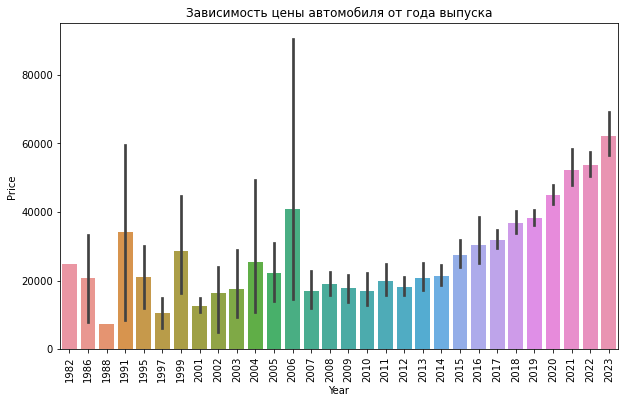

In [13]:
ax, fig = plt.subplots(figsize=(10, 6)) # посмотрим на зависимость стоимости автомобиля от года выпуска.
sns.barplot(cars_df['Year'], cars_df["Price"], data=cars_df)
plt.xticks(rotation=90)
plt.title('Зависимость цены автомобиля от года выпуска');

**Вывод:** Видим тенденцию к росту средней стоимости автомобиля при увеличении года выпуска, иначе говоря, новые машины стоят дороже, что закономерно. Но данная закономерность нарушается время от времени. Это можно объяснить удорожанием конкретных представляющих ценность моделей, а также их количество на рынке, то есть, например, на площадке может быть выставлен один редкий автомобиль 1982 года.

In [14]:
cars_df[cars_df['Year'] == 1982]

,Brand,Year,Exterior color,Interior color,Drivetrain,Fuel type,Capacity,Configuration,Valves,Accidents or damage,1-owner vehicle,Personal use only,MPG_min,MPG_max,MPG_mean,Mileage,Price
2188,Chevrolet,1982,Blue,White,Rear-wheel Drive,Gasoline,5.0,V8,16.0,At least 1 accident or damage reported,No,No,20.592777,27.239548,23.916163,55858.0,24993.0


---

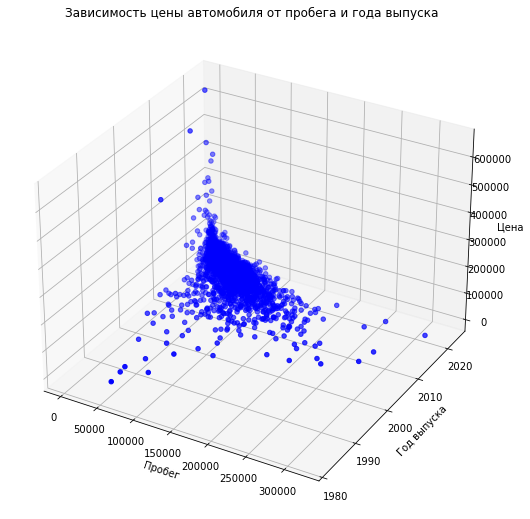

In [15]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = cars_df['Mileage']
y = cars_df['Year']
z = cars_df['Price']


ax.scatter(x, y, z, color = 'blue')
plt.xlabel('Пробег')
plt.ylabel('Год выпуска')
ax.set_zlabel('Цена')
plt.title('Зависимость цены автомобиля от пробега и года выпуска');

**Вывод:** В данном случае мы видим уже знакомые нам зависимости, то есть наибольшую стоимость имеют автомобили с маленьким пробегом и большим годом выпуска. Также заметим, что наибольшее число автомобилей имеет пробег до $200000$ миль, год выпуска от $2010$ до $2020$.

---

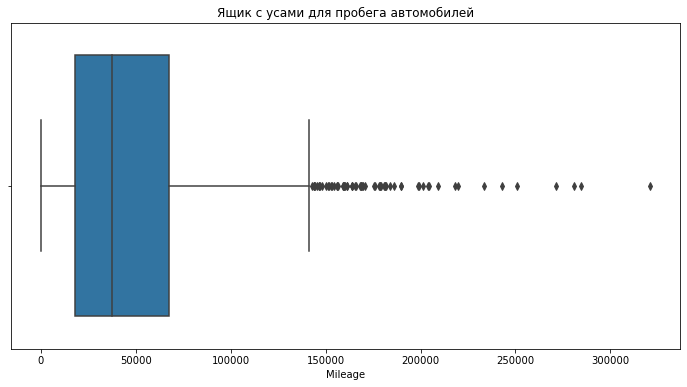

In [16]:
sns.boxplot(cars_df["Mileage"]) # сначала построим ящик с усами для пробега автомобиля
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title('Ящик с усами для пробега автомобилей')
plt.show();

**Вывод:** Таким образом, из графика видно, что медианное значение пробега автомобиля составляет примерно 37000 милей. Однако много объектов из выборки оказываются за границей верхнего квантиля, что свидетельствует о выбросах, которые содержатся в наших данных.

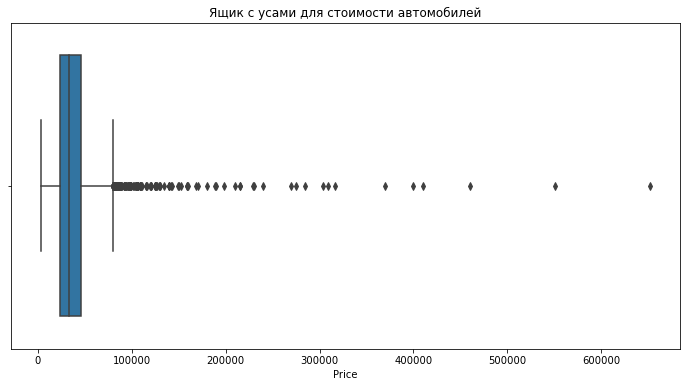

In [17]:
sns.boxplot(cars_df["Price"]) #проделаем то же самое для стоимости автомобилей
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.title('Ящик с усами для стоимости автомобилей')
plt.show();

**Вывод:** Проанализировав ящик с усами для стоимости автомобилей, мы теперь столкнулись с еще большим количеством выбросов вреди машин по их стоимости. Многие из этих объектов принимают значения в 5-10 раз больше, чем медианное, равное примерно 34000 долларов.

---

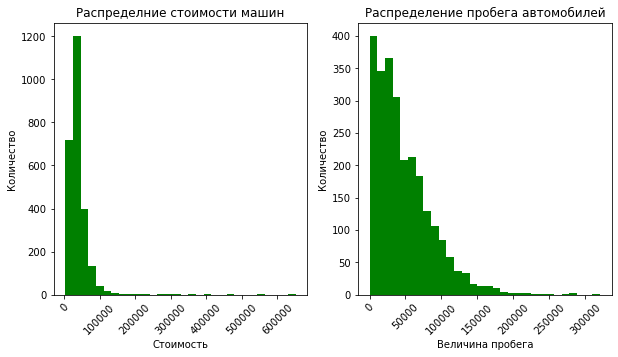

In [18]:
plt.figure(figsize=(10, 5)) # посмотрим теперь в отдельноси на распределния их двух переменных


plt.subplot(1, 2, 1)
plt.hist(cars_df['Price'], color = 'green', bins = 30)
plt.title('Распределние стоимости машин')
plt.xlabel('Стоимость')  
plt.ylabel('Количество')
plt.xticks(rotation=45)


plt.subplot(1, 2, 2)
plt.hist(cars_df['Mileage'], color = 'green',  bins = 30)
plt.title('Распределение пробега автомобилей')
plt.xlabel('Величина пробега')  
plt.ylabel('Количество')
plt.xticks(rotation=45);

**Вывод:** Оба графика представляют из себя иллюстрацию двух смещенных влево распределений. В случае целевой переменность мода равна примерно 40 000 долларов, а с увеличение цены количество выставленных по этой стоимости машин резко уменьшается. Если же рассматривать автомобильный пробег, то распределение этой переменной будет отдоленно походить на экспоненциальное распределние,имеющее большую скученность в отметке около 0. Таким образом, возникает, весьма интересное предположение, что помимо поддержанных машин на сайте продаются и автомобили от дилеров.

---

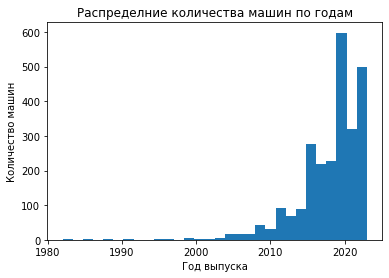

In [19]:
plt.hist(cars_df['Year'], bins = 30) # теперь посмотрим на количество машин в зависимости от их года выпуска
plt.title('Распределние количества машин по годам')
plt.xlabel('Год выпуска')  
plt.ylabel('Количество машин'); 

**Вывод:** Как видно из графика, большее количество машин, которые выставлены на продажу на сайте, были выпущены в 2018 и 2022 году. Таким образом, действительно, мы видим, что больше половины поддержвнных машин были выпущены после 2017 года. Более того, около 500 объявлений предлагают автомобили, срок эксплуатации которых меньше года.

---

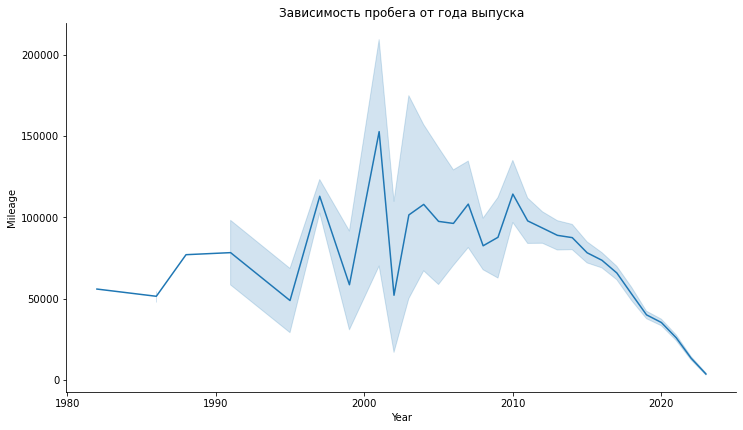

In [20]:
sns.relplot("Year", "Mileage", data=cars_df, kind="line")

plt.title('Зависимость пробега от года выпуска')

fig = plt.gcf()
fig.set_size_inches(12, 6);

**Вывод:** Видим, что начиная с $2000$-го года прослеживается снижение пробега при росте года выпуска, что вполне логично. Относительно небольшой пробег у старых машин можно объяснить тем, что их эксплуатировали неактивно. Это также разумно, так как изношенные старые автомобили уже не используются и, соответственно, не продаются.

---

---

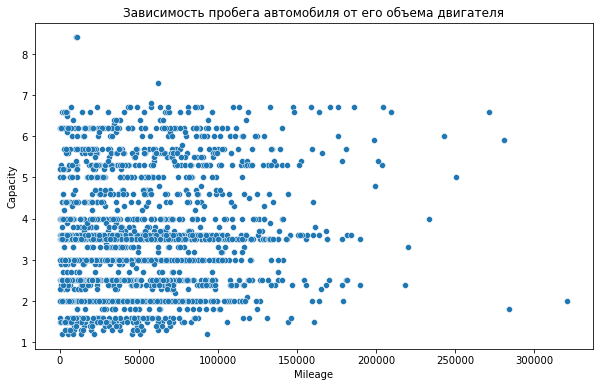

In [21]:
ax, fig = plt.subplots(figsize=(10, 6)) 
sns.scatterplot(x="Mileage", y="Capacity", data=cars_df)
plt.title('Зависимость пробега автомобиля от его объема двигателя');

**Вывод:** Двумерный график не показывает какой-либо зависимости между пробегом и объемом двигателя, возможно, потому что он не учитывает год выпуска.

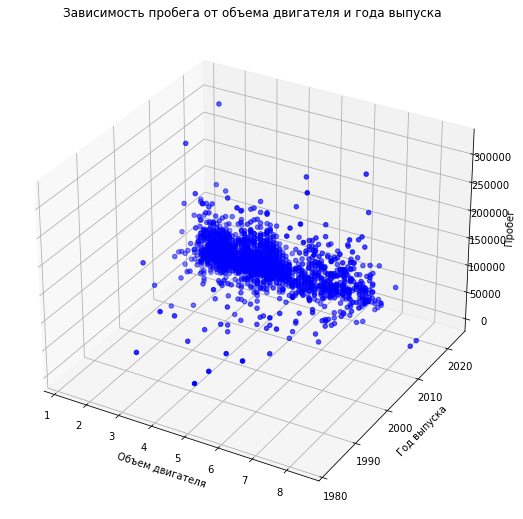

In [22]:
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

x = cars_df['Capacity']
y = cars_df['Year']
z = cars_df['Mileage']


ax.scatter(x, y, z, color = 'blue')
plt.xlabel('Объем двигателя')
plt.ylabel('Год выпуска')
ax.set_zlabel('Пробег')
plt.title('Зависимость пробега от объема двигателя и года выпуска');

**$NB:$** Идея для новой переменной - интенсивность использования: большой год выпуска + маленький объем двигателя + большой пробег = высокая интенсивность использования 

**Вывод:** В трехмерном случае явной зависимости пробега от года выпуска и объема двигателя не наблюдается, но, вероятно, комбинация всех этих переменных может влиять на цену автомобиля.

### Анализ категориальных и порядковых признаков

После того, как мы выявили зависимости между вещественными признаками, давайте посмотрим на категориальные.

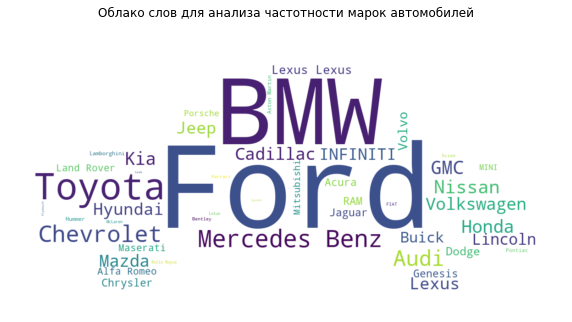

In [23]:
ax, fig = plt.subplots(figsize=(10, 6)) # для начала проанализируем марки автомобилей их частоту
mask = np.array(Image.open('car.png'))
wc = WordCloud(stopwords=STOPWORDS, 
               mask=mask, background_color="white",
               max_words=2000, max_font_size=300,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
text = ' '.join(cars_df['Brand'])
wc.generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.title('Облако слов для анализа частотности марок автомобилей')
plt.show()


**Вывод:** Как видно из графика, самыми распространенныеми брендами машин на американском рынке поддержанных автомобилей оказались BMV, Ford, Toyota, Mercedes-Bens и Chevrolet. Меньшее же предпочтение автолюбители отдали таким маркам, как MINI, Saab, Lotos. Стоит также отметить, что среди наиболее редко встречающихся марок автомобилей также присутсвуют такие бренды, как Ferrari, Rolls Roys и Bentley. Подобные результаты связаны с премиальность этих брендов и высокой ценой.

---

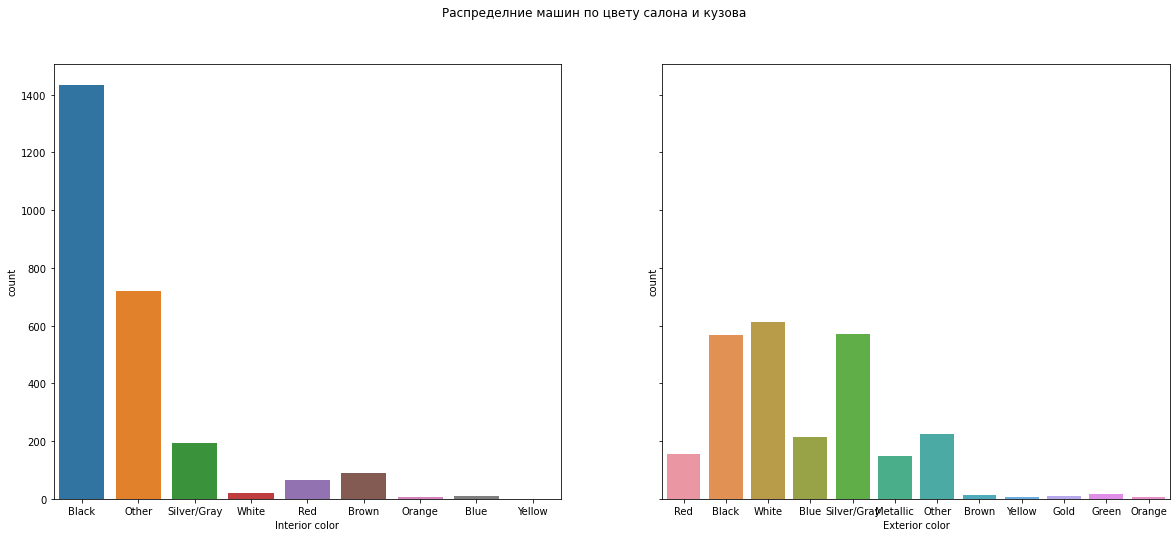

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey=True) # посмотрим на следующие категоральные признаки,
sns.countplot(x='Interior color', data=cars_df, ax = axes[0]) # отвечающие за цвет за цвет салона и кузова
plt.suptitle('Распределние машин по цвету салона и кузова')
sns.countplot(x='Exterior color', data=cars_df, ax = axes[1]);

**Вывод:** Итак, посмотрев на распределние количества автомобилей по цвету салона, нетрудно сделать вывод о популярности черного салона, который оказывается самым базовым и практичным. Однако практически более 700 объявлений на сайте содержат информации о более экзотелических цветах интерьера машины, которые не относятся к стандартных. 

Распределение же машин относительно цвета кузова оказывается более неоднознасным. Самым популярным и часто встречающимся цветов машины оказывается белыйъ, который опережает черный приктически на 50. Третьим по частоте цветом автомобилей на американском рынке поддержанных машин оказался серый, а вот всевозможные экзотические заняли 4 место (примернно 200 машин). 

---

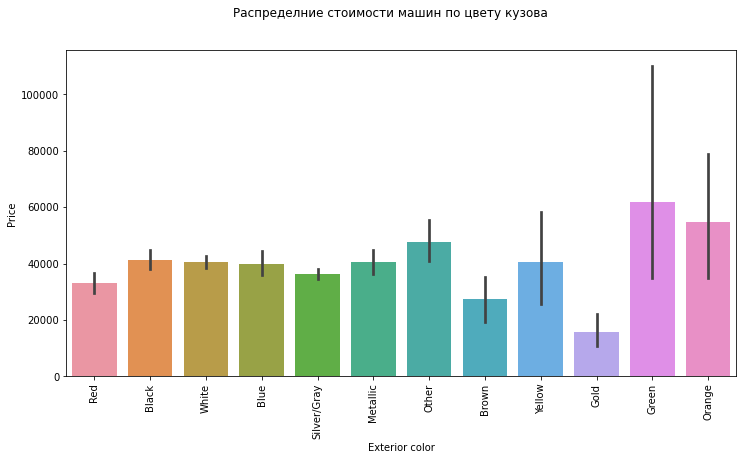

In [25]:
sns.barplot(cars_df["Exterior color"],cars_df["Price"],data=cars_df) # зависимость цены от цвета
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние стоимости машин по цвету кузова')
plt.show();

**Вывод:** Исходя из столбчатого графика видно, что максимальные значения стоимости принимают автомобили зеленого и оранжевого цвета, однако среди этих машин и наблюдается самое большое число выбросов (фитили у свечей). Можно предположить, что экзотические машины люксовых брендов имеют именно такие цвета, однако их количество ограничивается примерно 5-10 штуками из всего количества наблюдений. Меньшее количество выбросов имеют машины базовых цветов, таких как черного и белового, а так же серого. Их цены держатся стабильно около 40 000 долларов. 

Теперь перейдем к анализу распределния машин по типу используемого топлива.

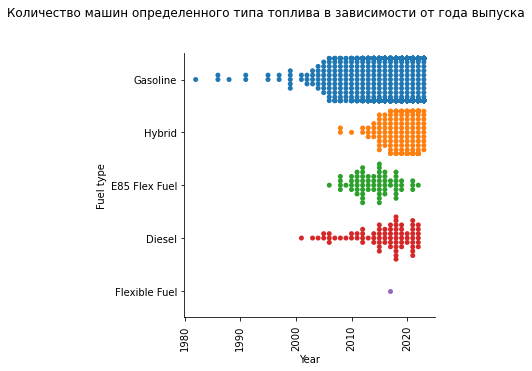

In [26]:
sns.catplot(x="Year",y="Fuel type",data=cars_df,kind="swarm")
plt.xticks(rotation=90)
plt.suptitle('Количество машин определенного типа топлива в зависимости от года выпуска')
plt.subplots_adjust(top= 0.85);

**Вывод:** Самым распространенным типом топлива среди поддержанных машин является бензин, занимающий  стабльные позиции с 2005 года. Вторыми по популярности оказываются дизейль и гибридный тип. Причем оба этих вида топлива стали чаще виднеться среди машин, выпущенных после 2015 года. E85 топливо, представляющее из себя смесь этанола и бензина, наоборот, имеет тенденцию к сокращению. Все большее число производителей старается переходить на более привычные типы горючего, несмотря и на плюсы E85 Flex Fuel. Также в нашей выборке содержится один объект, основным видом топлива которого является Flexible Fuel, то есть такое транспортное средство, которое может спокойно ездить на любом типе топлива, но это скорее исключение. При этом мы по нашей выборке мы наблюдает увеличение машин с более экологически чистыми типами горючего,н етрудно заметить, рост числа гибридных машин, ездящих на электричестве.

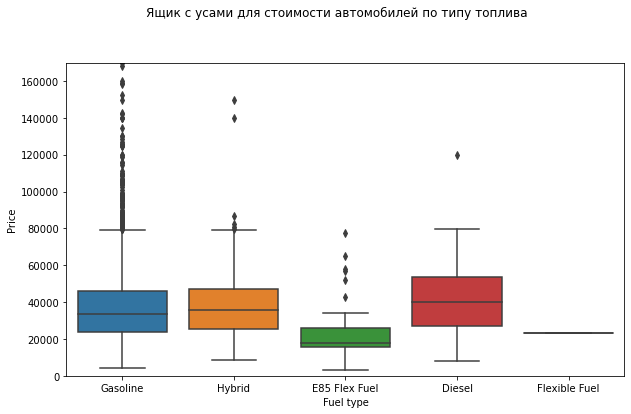

In [27]:
ax, fig = plt.subplots(figsize=(10, 6))
sns_plot = sns.boxplot(x='Fuel type', y='Price', data=cars_df)
sns_plot.set(ylim=(0, 170000))
plt.suptitle('Ящик с усами для стоимости автомобилей по типу топлива')
plt.subplots_adjust(top= 0.85);

**Вывод:** Итак, среди всех типов топлива самое высокое медианное значение стоимости принимают автомобили, ездящие на дизеле. В среднем стоимость машин на бензине и гибридном топливе имеют схожие медианные значение примерно 35 000 - 37 000 долларов. Однако среди машин, использующих бензин, налблюдается большое количество выбросов, которые выходят за верхнюю границу распределения. Автомобили с биотопливом или же E85 имеют сравнительно низкое медианное значение, которое оказывается ниже 20 000 долларов, но также имеются и выбросы на уровне 80 000 и 60 000 долларов.

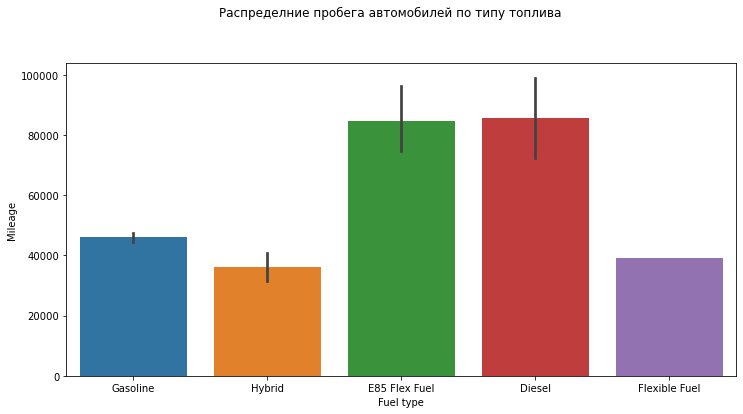

In [28]:
sns.barplot(cars_df["Fuel type"],cars_df["Mileage"])
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.suptitle('Распределние пробега автомобилей по типу топлива')
plt.subplots_adjust(top= 0.85)
plt.show();

**Вывод:** Теперь же машины с самым большим пробегом имеют дизельный мотор или ездят на биотопливе (примерно 80 000 миль для среднего значения). Однако и процент выбросов по этим категориям данных оказывается сравнительно большим. Среднее же значение пробега среди машин, ездящих на бензине, оказывается больше 40 000 миль. Гибридные же автомобили в среднем проезжают меньше, но вот значений сильно отклоняющихся от среднего среди них оказывается больше, чем у автомобилей на бензине.

Еще одним важным показателем для автомобилей является количество его ведущих колес или же привод. Давайте посмотрим, что интересного просиходит с этим признаком.

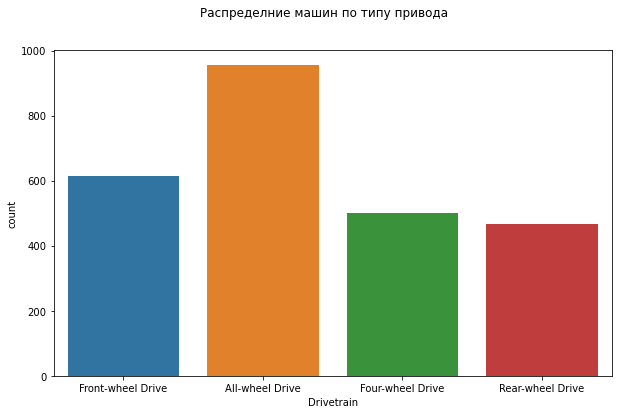

In [29]:
ax, fig = plt.subplots(figsize=(10, 6))
sns.countplot(x='Drivetrain', data=cars_df)
plt.suptitle('Распределние машин по типу привода');

**Вывод:** Таким образом, в нашей выборке большее количество машин имеют польный привод, вторым по популярности оказывается передних привод, а вот остальные два типа привода (все четыре колеса и задний привод) имеют менее 500 и 480 автомобилей соответсвенно.

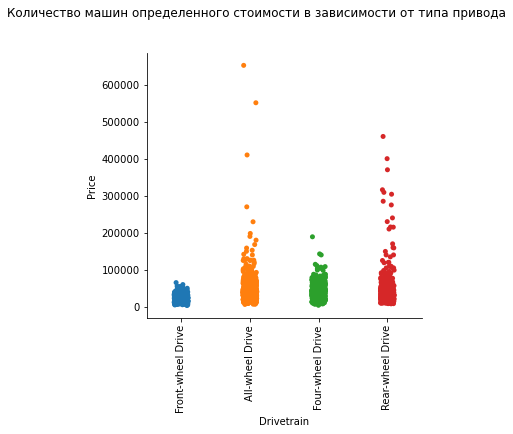

In [30]:
sns.catplot(x="Drivetrain",y="Price",data=cars_df);
plt.xticks(rotation=90)
plt.suptitle('Количество машин определенного стоимости в зависимости от типа привода')
plt.subplots_adjust(top= 0.85);

**Вывод:** Из графика видно, что в среднем все типы привода имеют большую скученность автомобилей по стоимости в районе до 100 000 долларов. Однако большее количество выбросов, находящихся в наших данных, имеют задний  и полный привод.

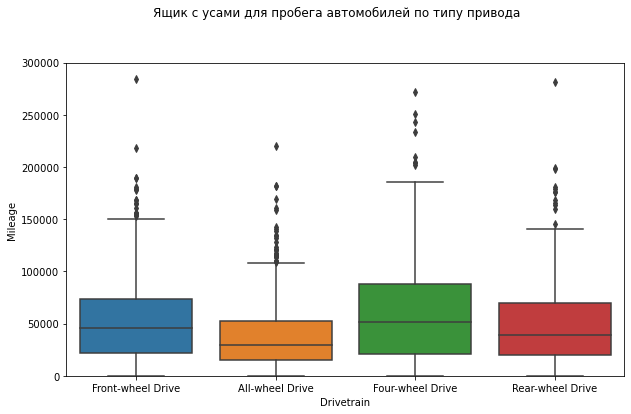

In [31]:
ax, fig = plt.subplots(figsize=(10, 6))
sns_plot = sns.boxplot(x='Drivetrain', y='Mileage', data=cars_df)
sns_plot.set(ylim=(0, 300000))
plt.suptitle('Ящик с усами для пробега автомобилей по типу привода')
plt.subplots_adjust(top= 0.85);

Посмотрим теперь на то влияет ли привод на величину пробега автомобиля. Как видно из графика, все категории содержат выбросы, которые выходят за верхние границы распределений. Самое высокое медианное же значение принимают машины с четырехколесным приводом, более 50 000 миль. А вот самое наименьшее у полноприводных автомобилей, тем самым демонстрируя разницу между этими видами привода. 

---

Перейдем к анализу количества клапанов и объему двигателя, а также их влиянию на цену.

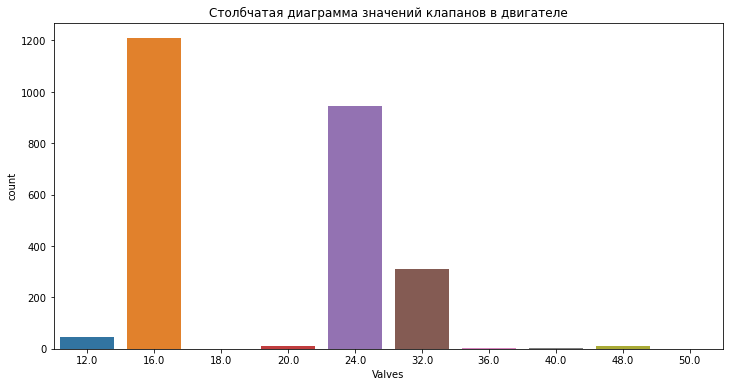

In [32]:
sns.countplot(x='Valves', data=cars_df)

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.title('Столбчатая диаграмма значений клапанов в двигателе');

**Вывод:** Видим, что большинство автомобилей имеет 16 клапанов в двигателе, также достаточно много машин с 24-мя и 16-ю клапанами, остальные вариации встречаются редко.

---

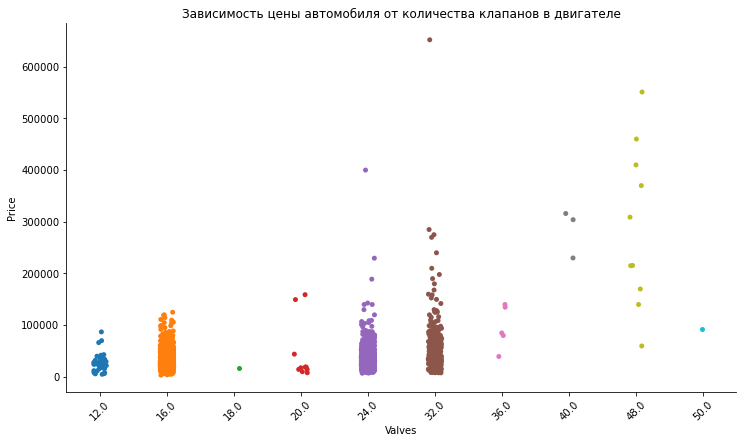

In [33]:
sns.catplot(x="Valves", y="Price", data=cars_df)

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.xticks(rotation=45)
plt.title('Зависимость цены автомобиля от количества клапанов в двигателе');

**Вывод:** На графике видно, что с ростом количества клапанов максимальная цена в большинстве случаев растет. Это может происходить из-за того, что большее число клапанов необходимо в усовершенствованных двигателях, что приводит к их удорожанию. Также данный график отражает суть прошлой диаграммы, так как плотность точек при 16, 24 и 32 клапанах наибольшая.

---

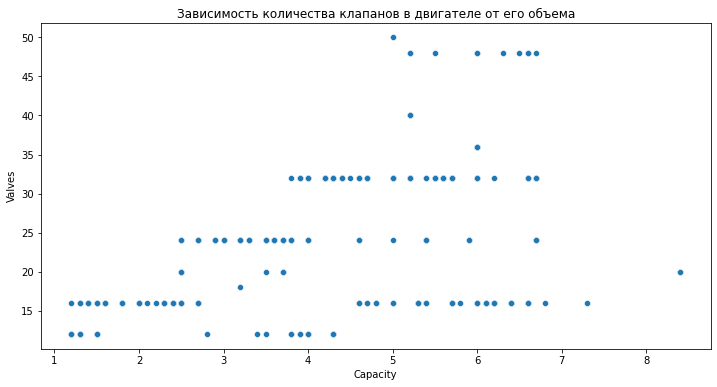

In [34]:
sns.scatterplot(x='Capacity', y='Valves', data=cars_df)

fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.title('Зависимость количества клапанов в двигателе от его объема');

**Вывод:** Видно, что с ростом объема появляются двигатели с большим количеством клапанов.

---

### Анализ бинарных признаков

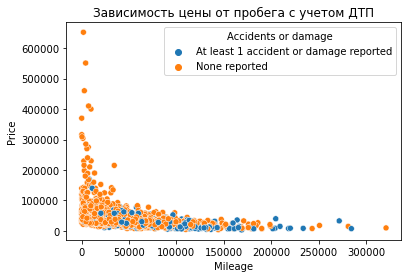

In [35]:
sns.scatterplot(data=cars_df, x='Mileage', y='Price', hue="Accidents or damage")
plt.title('Зависимость цены от пробега с учетом ДТП');

**Вывод:** Данный график уже был представлен выше. Что касается новых наблюдений, то видно, что нет автомобилей дороже 200000 долларов, попавших в ДТП. В то же время заметна закономерность роста количества автомобилей, участвовавших в ДТП, с ростом пробега.

---

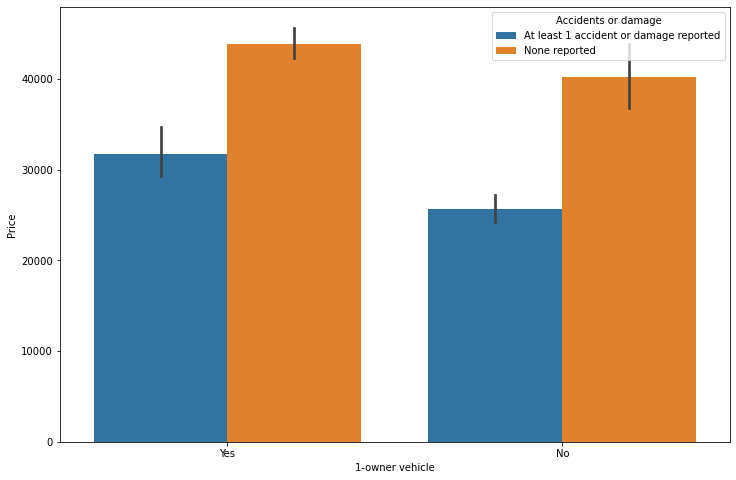

In [36]:
sns.barplot(data=cars_df, x="1-owner vehicle", y='Price', hue="Accidents or damage")
fig = plt.gcf()
fig.set_size_inches(12, 8);

**Вывод:** Видно, что автомобили, не участвовавшие в ДТП, в любом случае в среднем стоят дороже, но при этом разница больше, если владельцев более одного.

---

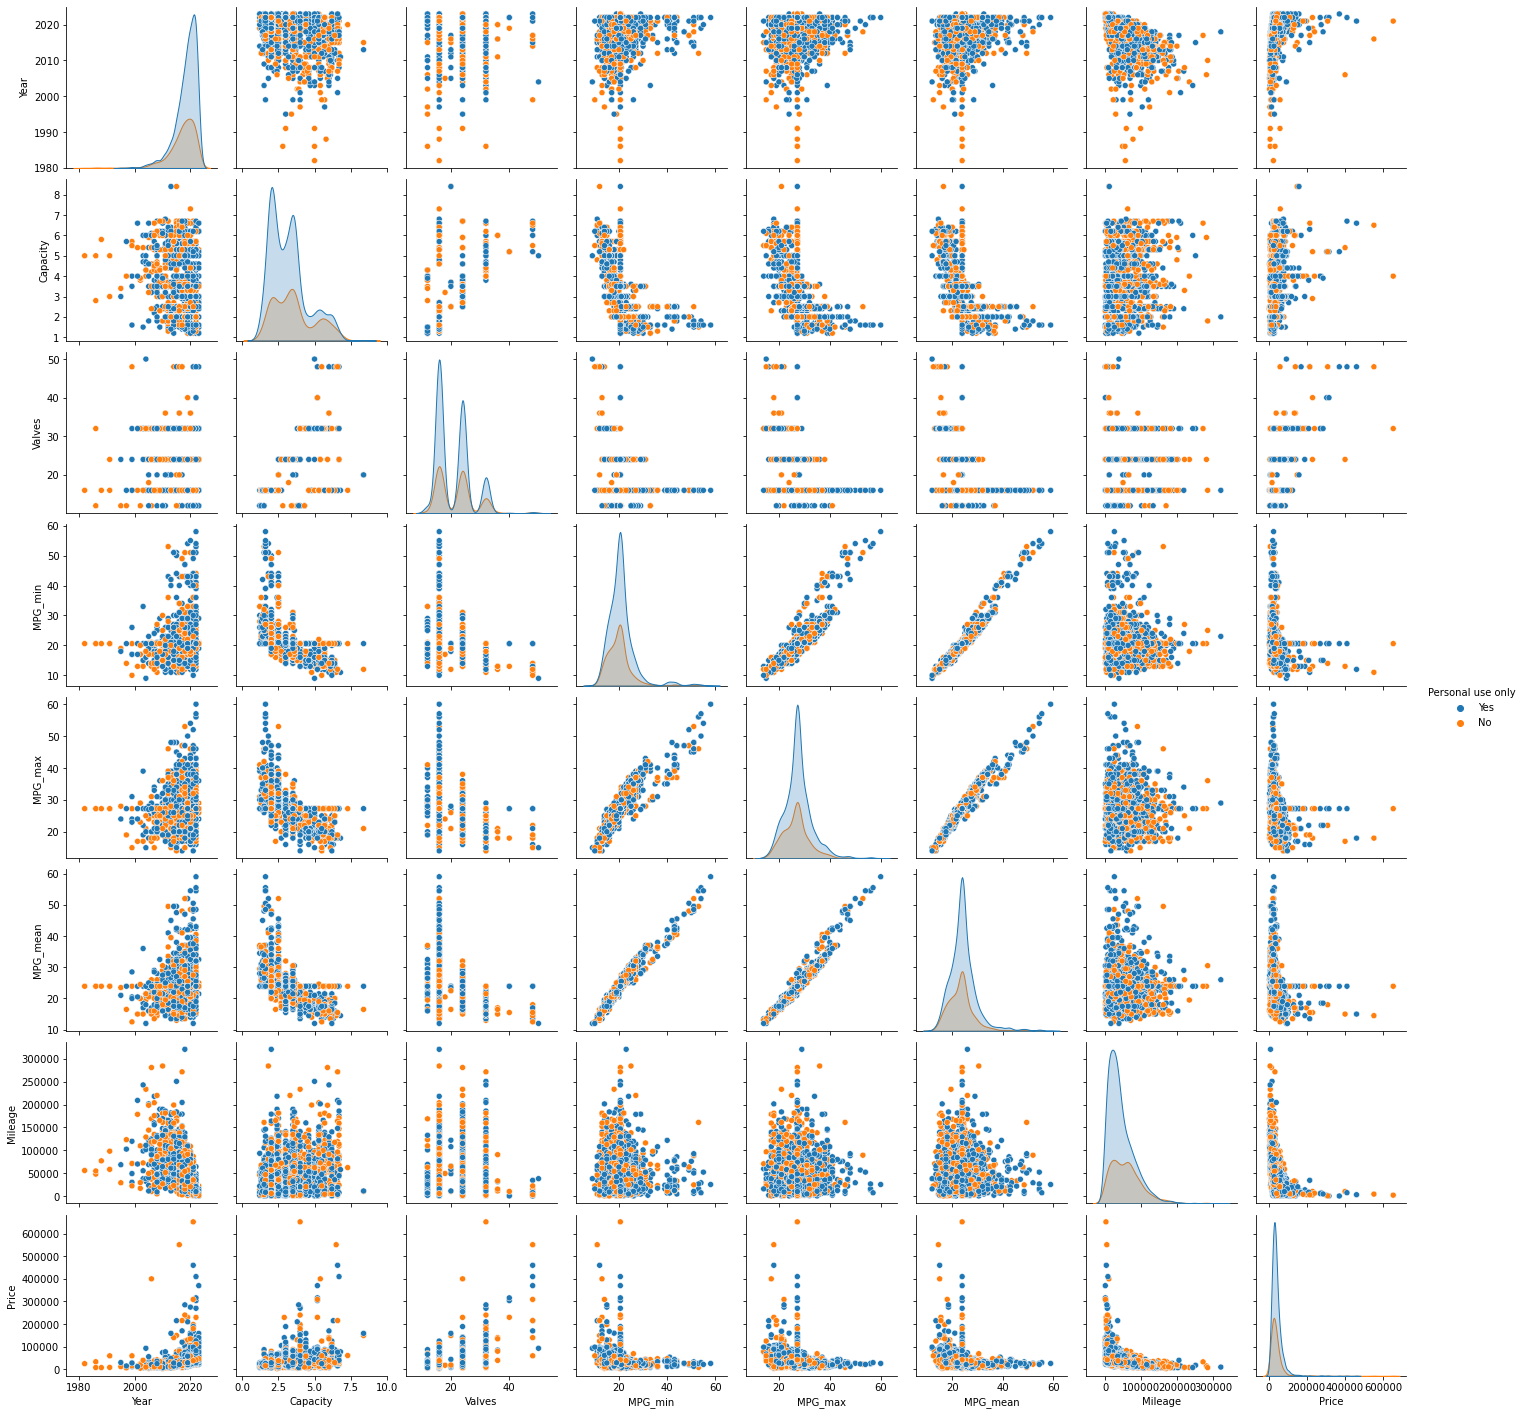

In [37]:
sns.pairplot(cars_df, hue="Personal use only"); # посмотрим на все графики, которые разделены по призаку о личном использовании

---

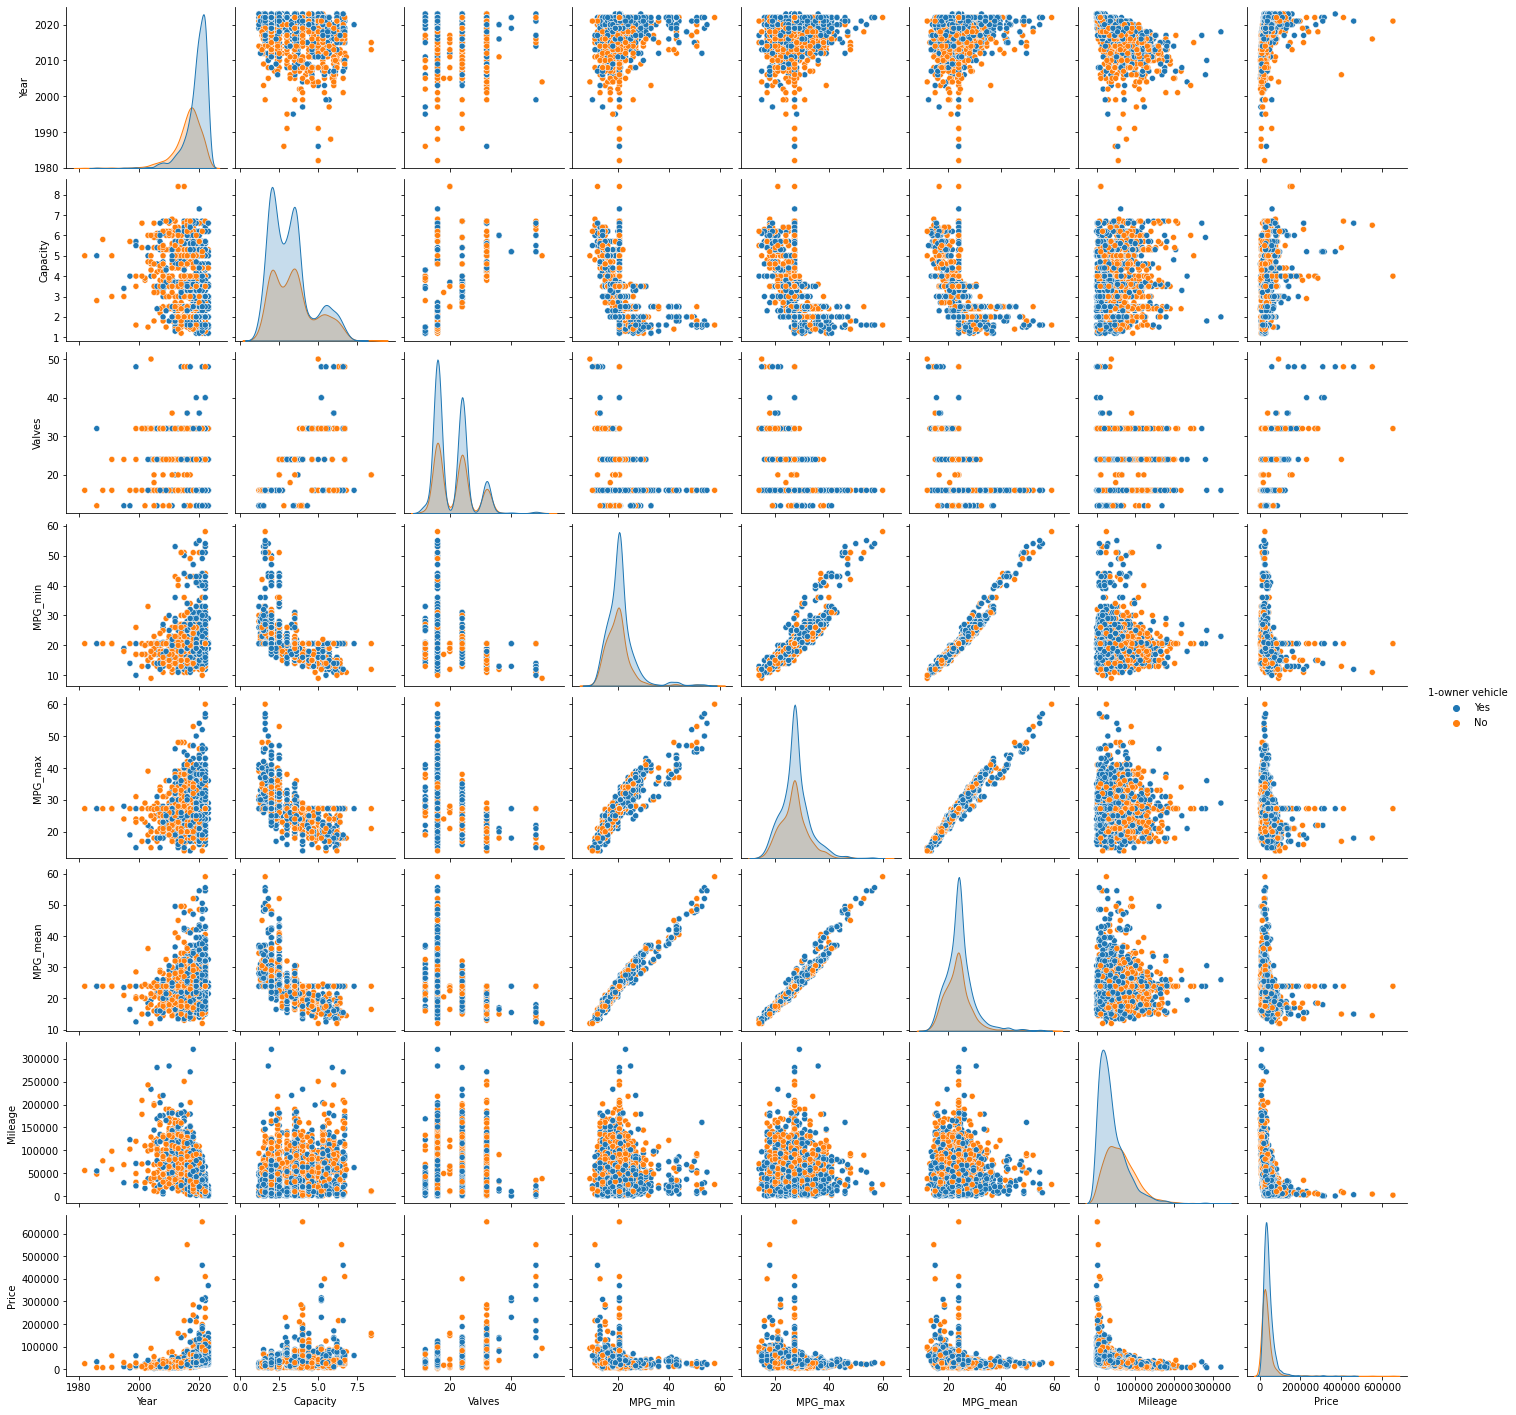

In [38]:
sns.pairplot(cars_df, hue="1-owner vehicle")  # посмотрим на все графики, которые разделены по призаку о единственном владельце